In [1]:
import constrained as cd
from constrained.constraints import inset, vertically_stacked

import importlib
importlib.reload(cd)

<module 'constrained' from 'c:\\Private_Projects\\constrained\\constrained-py\\constrained\\__init__.py'>

In [18]:
def titled_box(width: float, height, title: str, subtitle: str = None, box_style=None, title_style = None):
    box = cd.Rect(style=box_style)
    title = cd.Text(title, style=title_style)
    if subtitle is not None:
        subtitle = cd.Text(subtitle, style=title_style)
        text = cd.Group([title, subtitle], [vertically_stacked([title, subtitle], dist=5, align="center")])
    else:
        text = title
    return cd.Group([box, text], [
        box.bounds.center == text.bounds.center,
        box.bounds.width == width,
        box.bounds.height == height
    ])

In [19]:
cpu = titled_box(200, 200, "CPU", "(PicoRV32)", cd.Style(fill=(255, 255, 200)), cd.Style(fill = (0, 0, 0)))
rom = titled_box(100, 75, "ROM", "(1 KB)", cd.Style(fill=(255, 150, 100)), cd.Style(fill=(0, 0, 0)))
ram = titled_box(100, 75, "RAM", "(128 KB)", cd.Style(fill=(255, 150, 150)), cd.Style(fill=(0, 0, 0)))

core = cd.Group([cpu, rom, ram], [
    cpu.bounds.top == rom.bounds.top,
    cpu.bounds.bottom == ram.bounds.bottom,
    rom.bounds.left == ram.bounds.left,
    rom.bounds.left > cpu.bounds.right
])

Solved 129 constraints in 0.016s


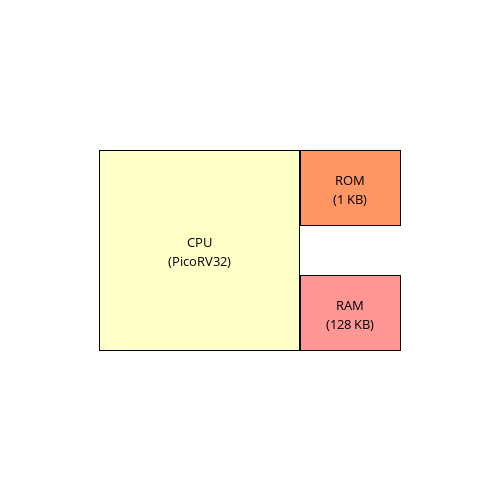

In [20]:
width = 500
height = 500

bg = cd.Rect(top_left = cd.point((0, 0)), width=width, height=height, style=cd.Style(fill=(255, 255, 255), outline=None))



root = cd.Group([core], [
    core.bounds.center == bg.bounds.center,
])

canvas = cd.Canvas(width, height, root)
canvas.show()